<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.3: Stacking

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.


# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data (breast-cancer-wisconsin-data-old.csv)
- Perform some basic structural cleaning to facilitate the work

In [302]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [575]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [577]:
#Import data
df = pd.read_csv('/Users/annaxu/Documents/Data Science/DATA/breast-cancer-wisconsin-data-old - Cleaned.csv', index_col = 0)
df.head()

,Clump_Thickness,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_number,,,,,,,,
1000025,1.609438,0.000000,0.693147,0.000000,1.098612,0.000000,0.0,0
1002945,1.609438,1.609438,1.945910,2.302585,1.098612,0.693147,0.0,0
1015425,1.098612,0.000000,0.693147,0.693147,1.098612,0.000000,0.0,0
1016277,1.791759,0.000000,1.098612,1.386294,1.098612,1.945910,0.0,0
1017023,1.386294,1.098612,0.693147,0.000000,1.098612,0.000000,0.0,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [580]:
#As per lab 7.2.1

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [583]:
#As per lab 7.2.1

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? All features except for Class
- Is there an output variable (label)? Class
- If there is an output variable:
    - What is it? Malignant (1)/Benign (0)
    - What is its type? Integer
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [587]:
#Define target and predictor variables
X = df.drop(columns = 'Class')
y = df['Class']
#Create test/train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [590]:
#Define and fit Naive-Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#Define and fit KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#Define and fit decision tree model
rf_model = RandomForestClassifier(random_state =1) 
rf_model.fit(X_train, y_train)

#Define and fit the meta_classifier (even though it's already logistic regression by default)
lr = LogisticRegression()

#Create and fit the ensemble model
stack = StackingClassifier(
    classifiers = [lr_model, nb_model, knn_model, rf_model],
    meta_classifier = lr)

stack.fit(X_train, y_train)

StackingClassifier(classifiers=[LogisticRegression(), GaussianNB(),
                                KNeighborsClassifier(),
                                RandomForestClassifier(random_state=1)],
                   meta_classifier=LogisticRegression())

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [593]:
y_train_pred = stack.predict(X_train)
print('Accuracy score: {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print()
array = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix = pd.DataFrame(array, columns = ['predicted_no_donate', 'predicted_donate'], index = ['does_not_donate', 'does_donate'])
print(confusion_matrix)
print()
print(classification_report(y_train, y_train_pred))

Accuracy score: 0.998

                 predicted_no_donate  predicted_donate
does_not_donate                  332                 0
does_donate                        1               178

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      0.99      1.00       179

    accuracy                           1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511



# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [596]:
y_test_pred = stack.predict(X_test)
print('Accuracy score: {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print()
array = metrics.confusion_matrix(y_test, y_test_pred)
confusion_matrix = pd.DataFrame(array, columns = ['predicted_no_donate', 'predicted_donate'], index = ['does_not_donate', 'does_donate'])
print(confusion_matrix)
print()
print(classification_report(y_test, y_test_pred))

Accuracy score: 0.9649

                 predicted_no_donate  predicted_donate
does_not_donate                  110                 1
does_donate                        5                55

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       111
           1       0.98      0.92      0.95        60

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



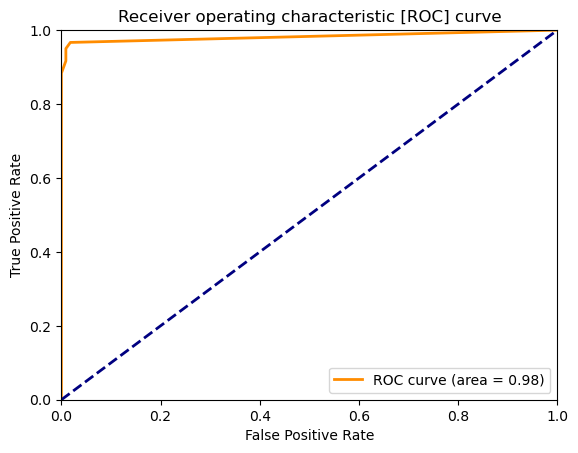

In [598]:
y_test_prob = stack.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic [ROC] curve')
plt.legend(loc = "lower right")
plt.show()

In [602]:
# List of models and their names
base_models = [
    ('NB', nb_model),
    ('KNN', knn_model),
    ('Random Forest', rf_model),
    ('Stacked Ensemble', stack)
]

# Store results
results = []

# Evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3) if roc_auc is not None else 'N/A'
    })

# Evaluate all models
for name, model in base_models:
    evaluate_model(name, model, X_test, y_test)

# Display results
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

           Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
              NB     0.977      0.967   0.967     0.967    0.997
             KNN     0.971      1.000   0.917     0.957    0.983
   Random Forest     0.965      0.982   0.917     0.948    0.998
Stacked Ensemble     0.965      0.982   0.917     0.948    0.982


Interpretation:
- Naive_Bayes performed well standalone but through the stacked ensemble, we were able to improve precision from 0.967 to 0.982.
- Accuracy = 0.965 < min. baseline result 0.9667.
- ROC AUC = 0.982 > min. baseline result 0.9614.
- Therefore, model performs better than baseline in ROC AUC but not in accuracy.

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

The model can be used to predict whether someone has breast cancer or not. Stacking performed worse than bagging and boosting ensemble techniques.



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



